# Forth Point Working Notebook

“For the presentation bit of the interview, we would like Adrian to explore the data to answer the following question: “What can you tell me about my machine performance?”. The presentation can be in PowerPoint or in PowerBI (or any other tool Adrian would like to use) and should be max 25 minutes”

What can you tell me about my machine performance?
What can I learn from the data for machine performance business metrics?
Can I use this data for a machine learning project for machine performance business metrics?

## EDA
- Univariate Analysis / Bivariate Analysis
- Multivariate Analysis
- Data Cleaning
- Test Assumptions

## Feature Engineering / Feature Selection
- Scaling, Discretization, Fill Missing, Cross features, Categorical encoding
- Random Forest Feature importance or L1 regression


## Modelling
- Logistic Regression
- Random Forest

## Evaluation

- Segmented Analysis
- Model Calibration

## Questions?

- What is "Target"?
- What is "Error"?
- What is "Machine Type"?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(10,10)

df = pd.read_csv('sample_interview_dataset.csv')
df.sort_values('Timestamp')

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,2001-12-01 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,2001-12-01 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,2001-12-01 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,2001-12-01 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,2001-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
9730,L56910,X2,298.8,310.0,1528.0,36.7,147,0,No Failure,2013-01-10 10:00:00
9753,L56933,X2,298.5,309.8,1593.0,35.1,203,0,No Failure,2013-01-11 09:00:00
9774,H39188,X2,298.6,309.5,1375.0,41.0,39,0,No Failure,2013-01-12 06:00:00
9966,L57146,X2,298.3,307.9,1507.0,121.0,149,0,No Failure,2013-01-20 06:00:00


In [3]:
df.dtypes

UID                         object
Machine Type                object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
Timestamp                   object
dtype: object

### Real Data

/Additude
Shows characteristics of real-data, skews, normally distributed, unbalanced

0.01


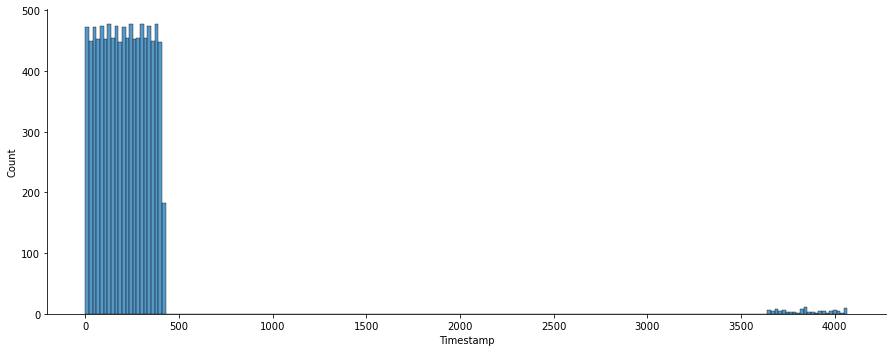

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
num_date = df['Timestamp'] - df['Timestamp'].iloc[0]
num_date = num_date.dt.days
sns.displot(num_date, aspect=2.5)
print(np.sum(num_date > 3000) / len(num_date))


Machine Type
Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]
Target
Failure Type


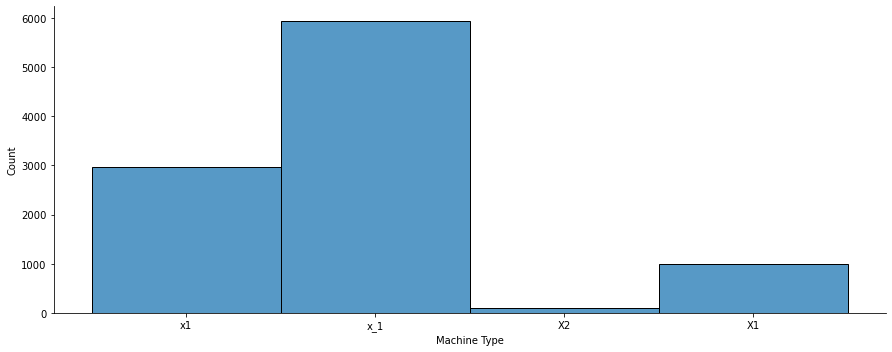

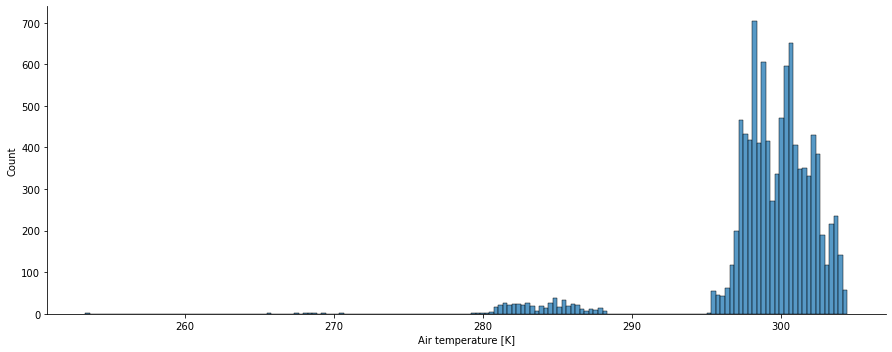

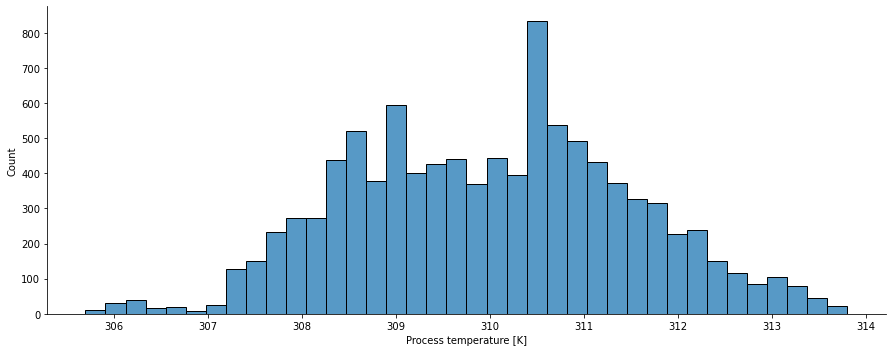

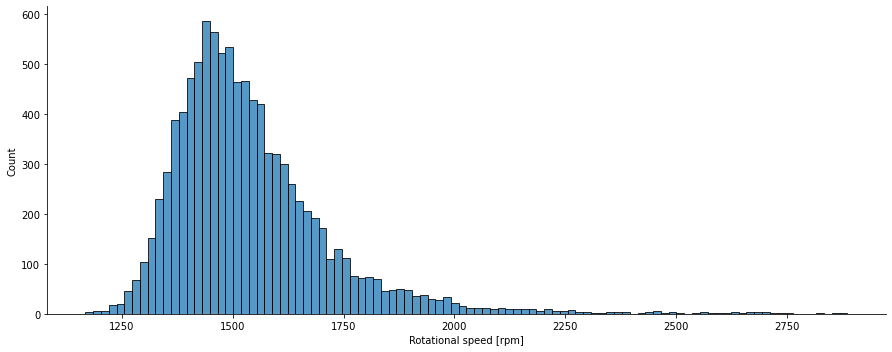

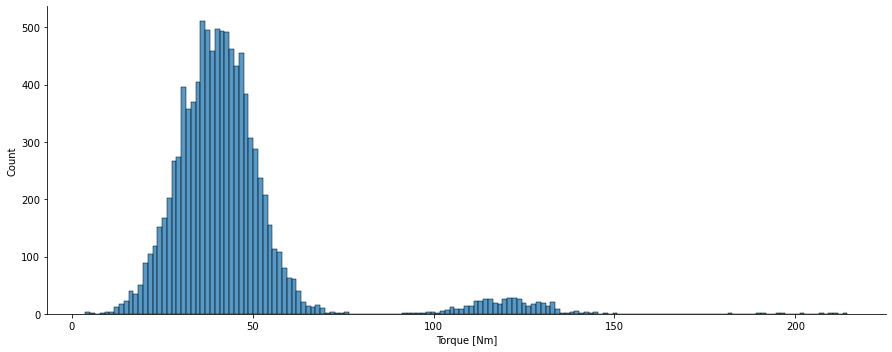

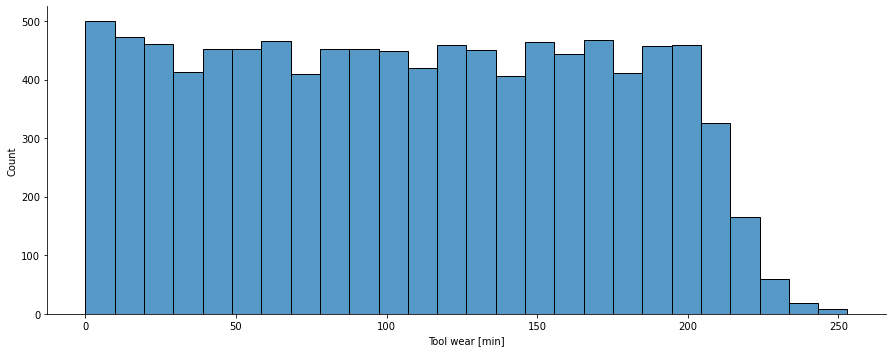

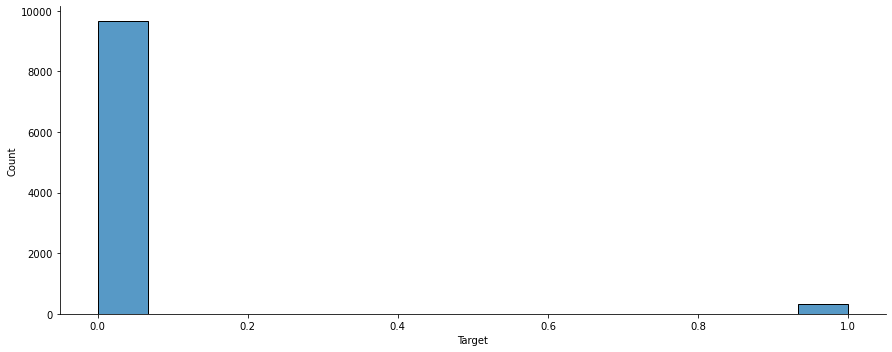

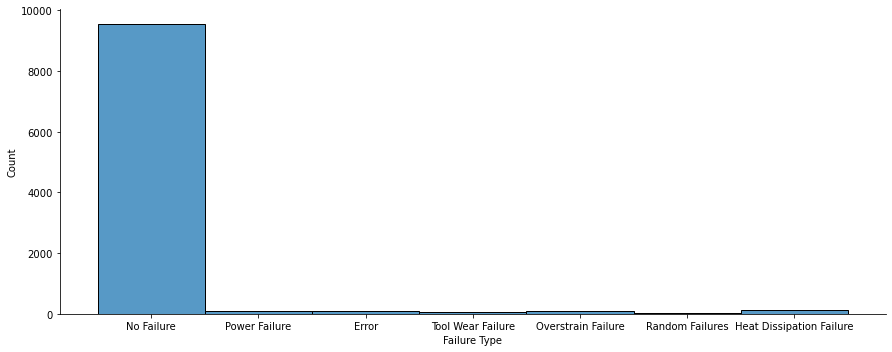

In [5]:
from scipy.stats import boxcox
feature_cols = df.columns.drop(['UID', 'Timestamp'])
for col in feature_cols:
    print(col)
    sns.displot(df[col], aspect=2.5)

/home/adrian/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/adrian/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/adrian/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


204.9145046287565
0.26805340627324903


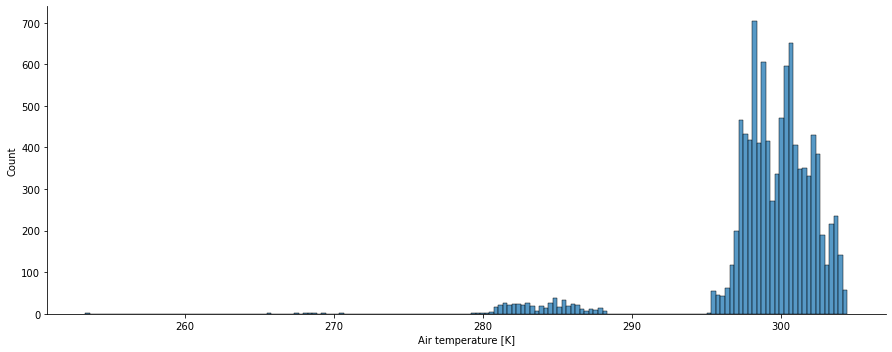

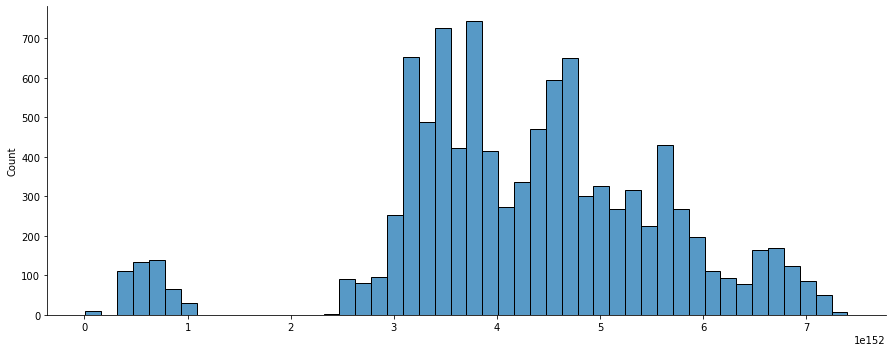

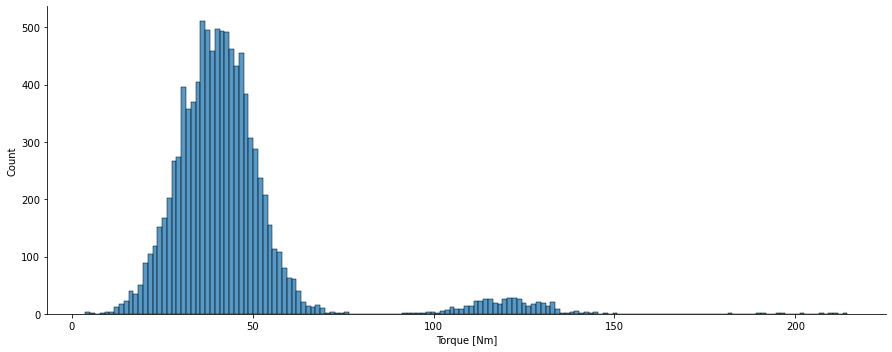

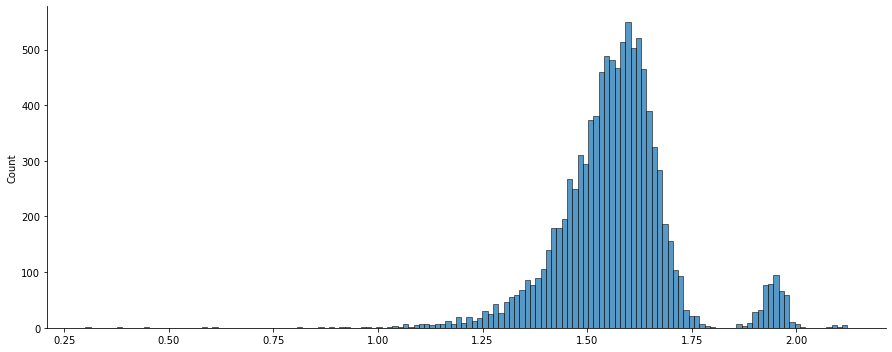

In [6]:
for col in ['Air temperature [K]', 'Torque [Nm]']:
    out = boxcox(np.log(df[col]))
    print(out[1])
    sns.displot(df[col], aspect=2.5)
    sns.displot(out[0], aspect=2.5)

Air temperature [K]


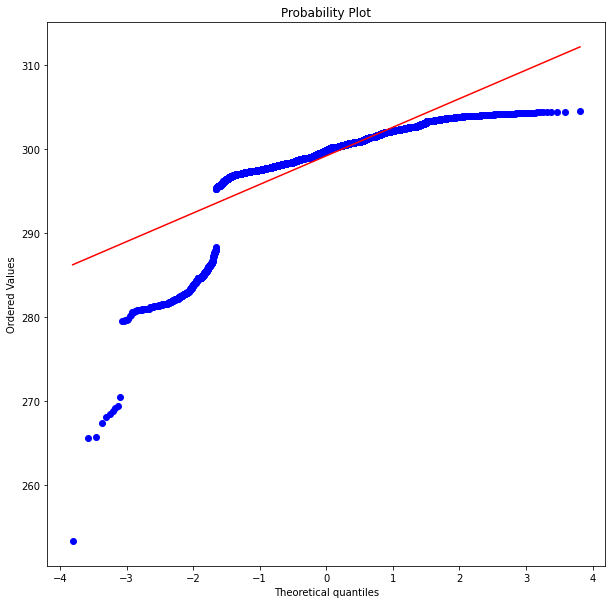

/home/adrian/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/adrian/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/adrian/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


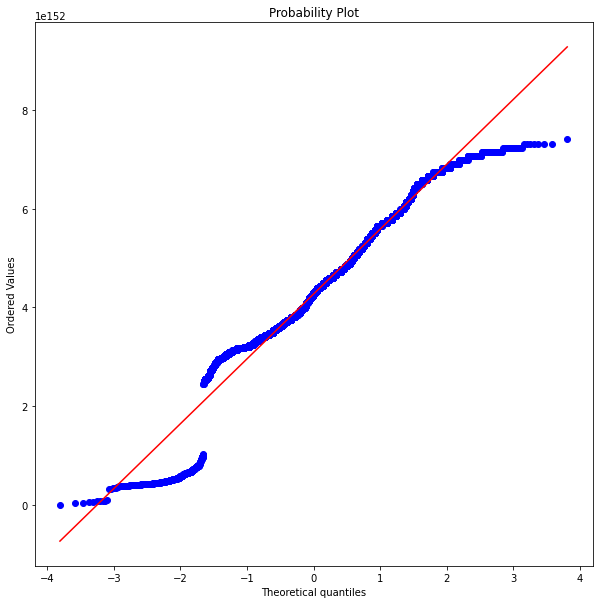

Torque [Nm]


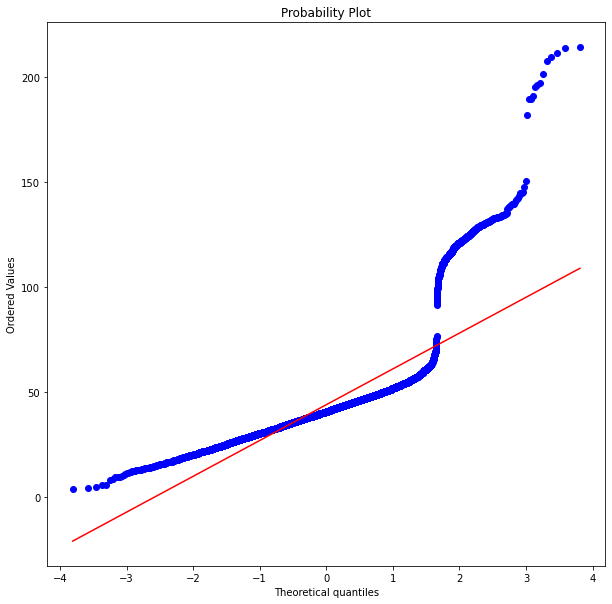

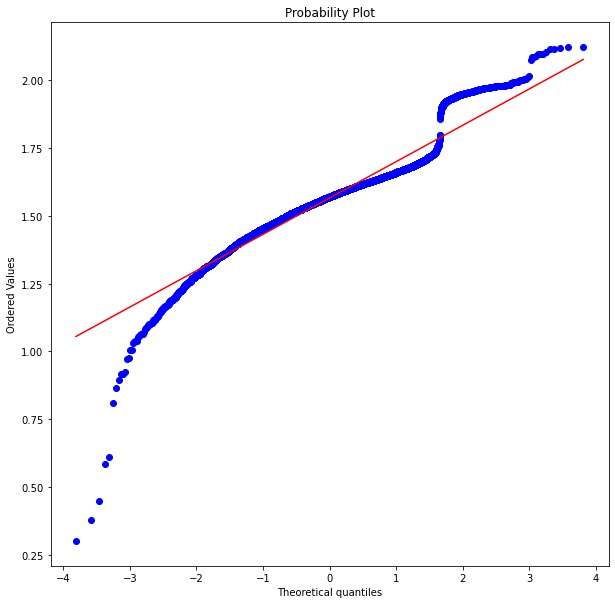

In [7]:
from scipy.stats import probplot

test_normal = ['Air temperature [K]',
'Torque [Nm]']

for col in test_normal:
       print(col)
       probplot(df[col], plot=plt)
       plt.show()
       probplot(boxcox(np.log(df[col]))[0], plot=plt)
       plt.show()
#for col in test_normal:
#    sns.displot(np.log(df[col]), aspect=2.5)

In [8]:
display(df['Machine Type'].value_counts())
display(df['Target'].value_counts())
display(df['Failure Type'].value_counts())
display(df.groupby(['Failure Type', 'Target']).size())
display(df.groupby(['Failure Type', 'Machine Type']).size())

x_1    5937
x1     2974
X1      989
X2      100
Name: Machine Type, dtype: int64

0    9661
1     339
Name: Target, dtype: int64

No Failure                  9553
Heat Dissipation Failure     112
Error                        100
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               17
Name: Failure Type, dtype: int64

Failure Type              Target
Error                     0          100
Heat Dissipation Failure  1          112
No Failure                0         9544
                          1            9
Overstrain Failure        1           78
Power Failure             1           95
Random Failures           0           17
Tool Wear Failure         1           45
dtype: int64

Failure Type              Machine Type
Error                     X1                 8
                          X2                 1
                          x1                24
                          x_1               67
Heat Dissipation Failure  X1                 8
                          X2                 2
                          x1                30
                          x_1               72
No Failure                X1               957
                          X2                97
                          x1              2869
                          x_1             5630
Overstrain Failure        X1                 1
                          x1                 4
                          x_1               73
Power Failure             X1                 5
                          x1                31
                          x_1               59
Random Failures           X1                 4
                          x1                 2
                     

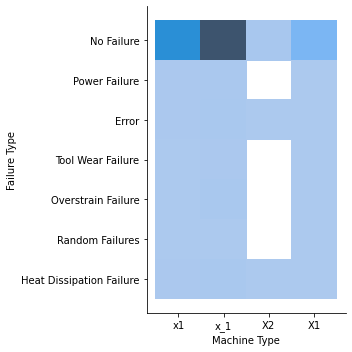

In [9]:
sns.displot(data=df, x='Machine Type', y='Failure Type')

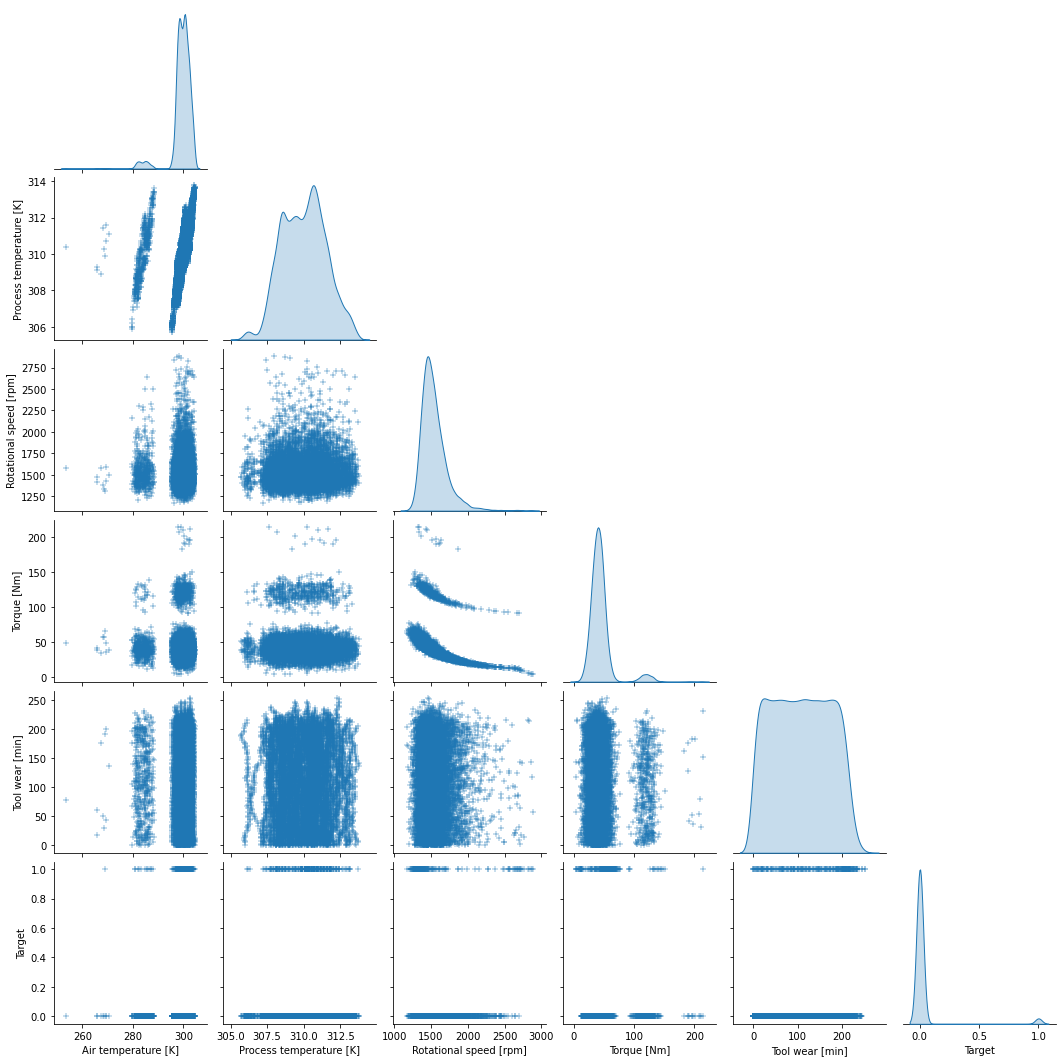

In [10]:
sns.pairplot(df[feature_cols], corner=True, markers='+', diag_kind='kde')

<AxesSubplot:>

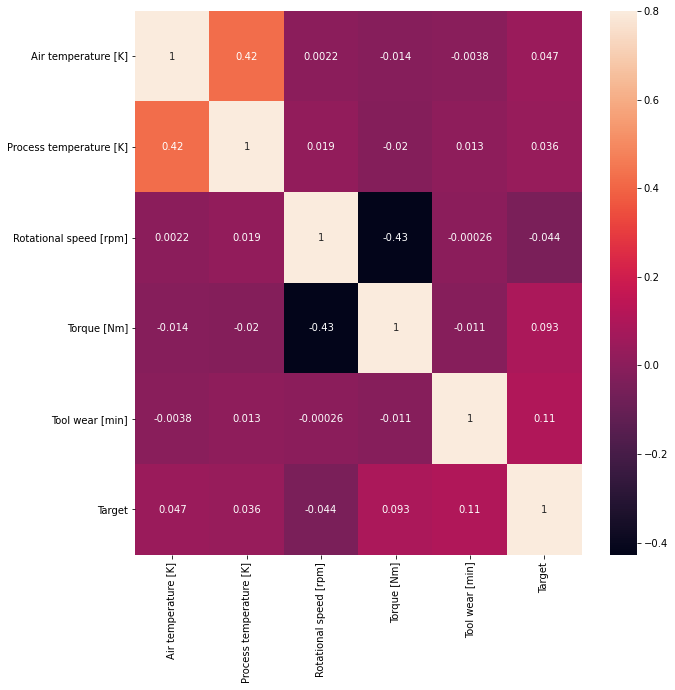

In [11]:
sns.heatmap(df[feature_cols].corr(), vmax=0.8, annot=True)

### Time decomp
- histograms of time decomp
- pairplots with time decomp

### Bi-variate
- Create one hot encoding and plot pairplots and correlation heatmap again.

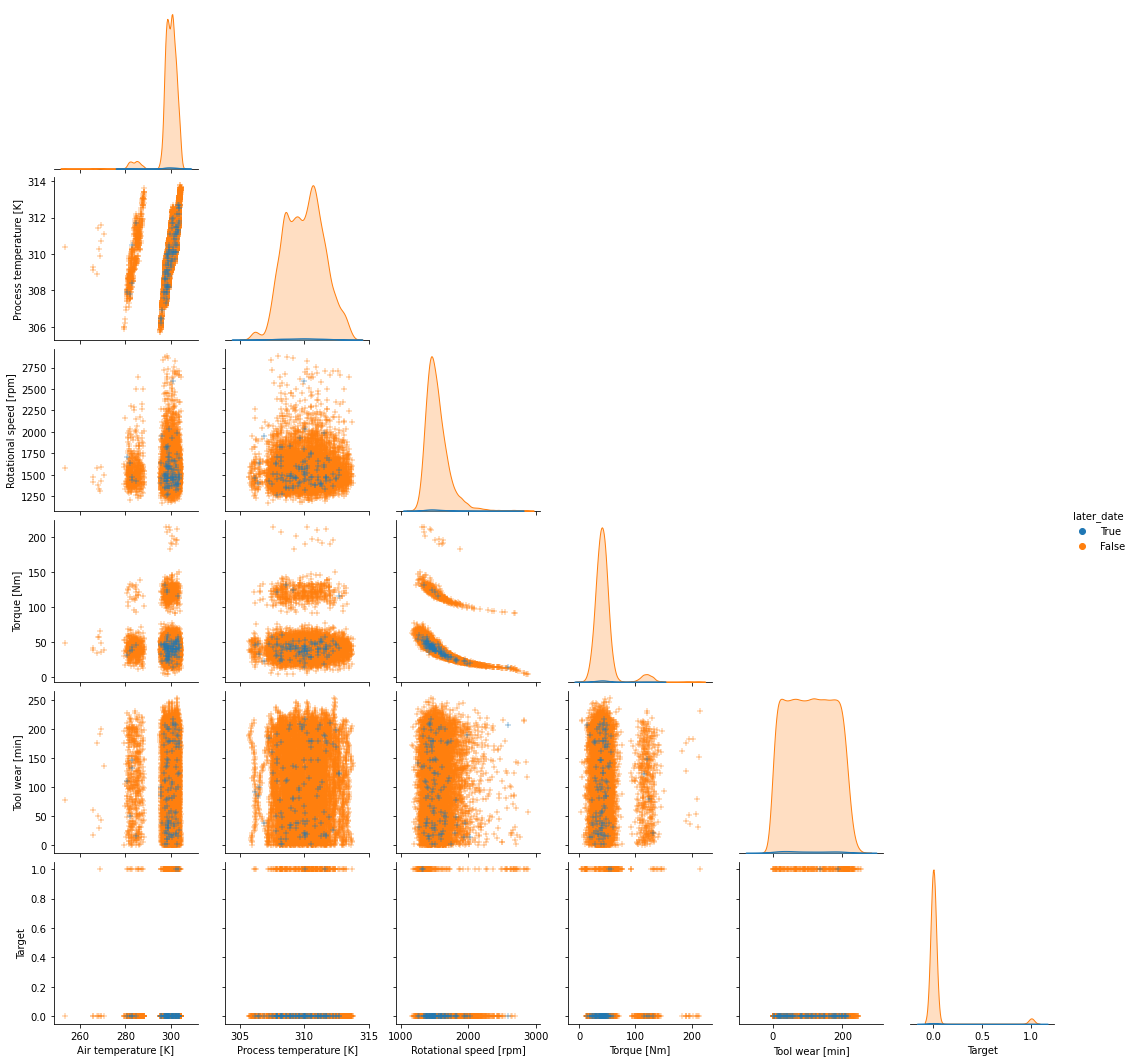

In [12]:
df['later_date'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.days > 500
plot_df = df[feature_cols.tolist() + ['later_date']]
plot_df = plot_df.sort_values(by='later_date')
sns.pairplot(plot_df, hue='later_date', hue_order=[True, False], corner=True, markers='+')


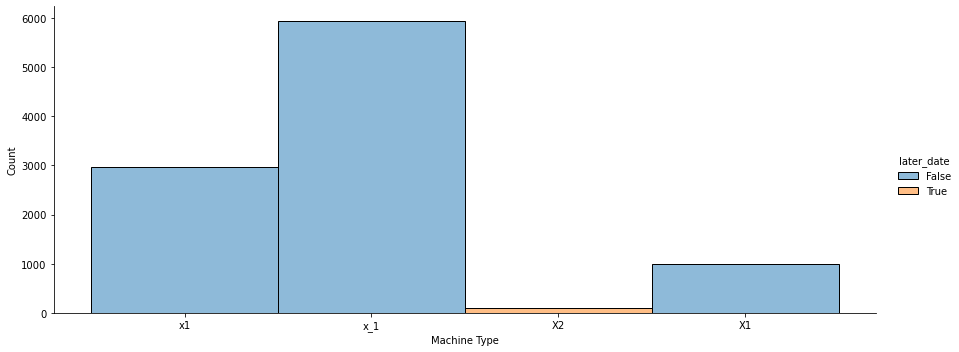

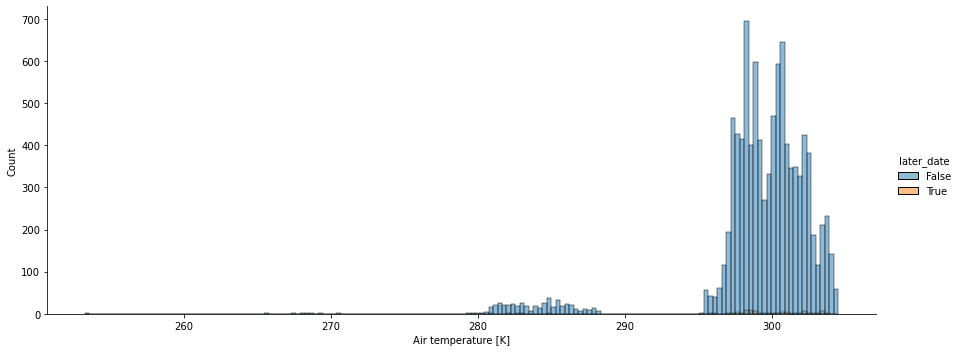

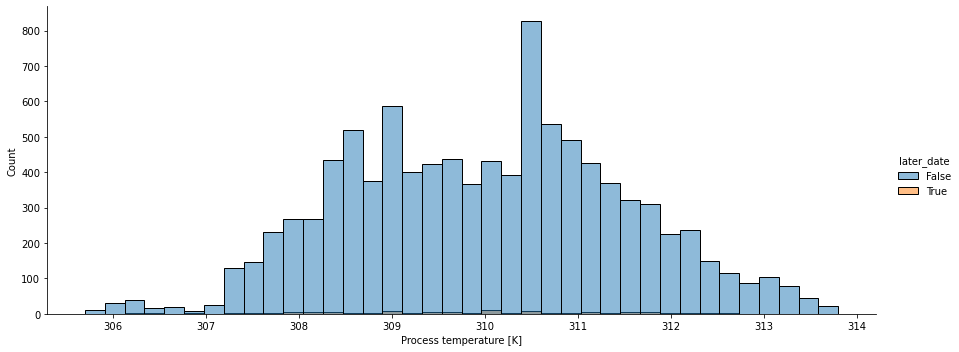

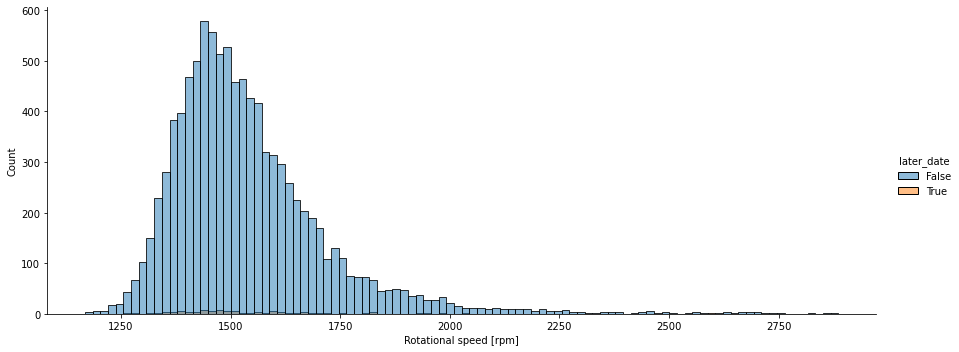

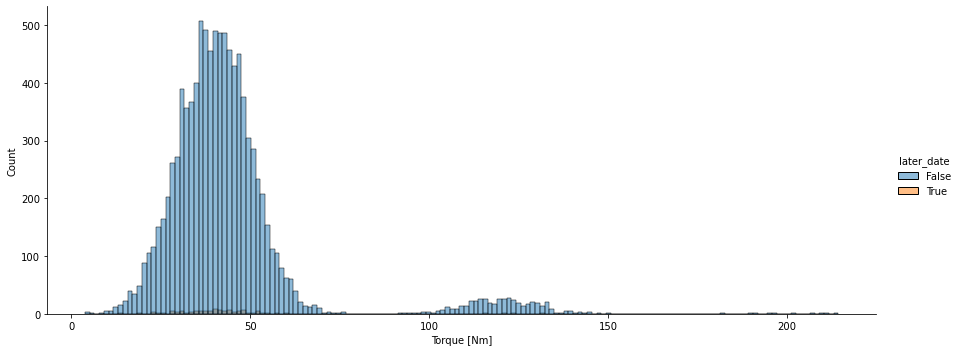

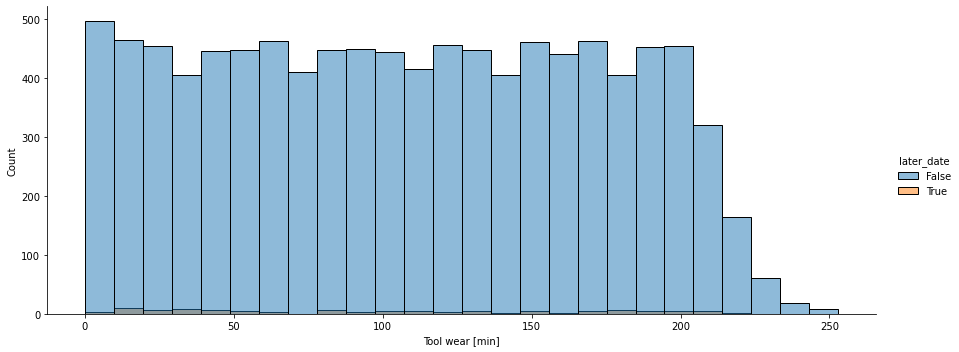

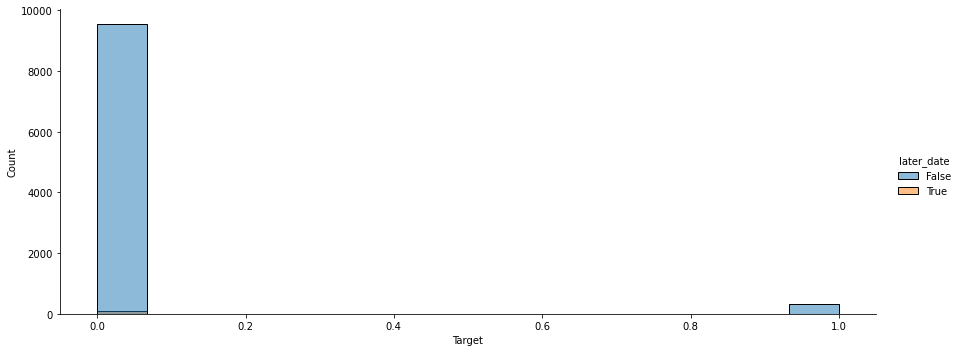

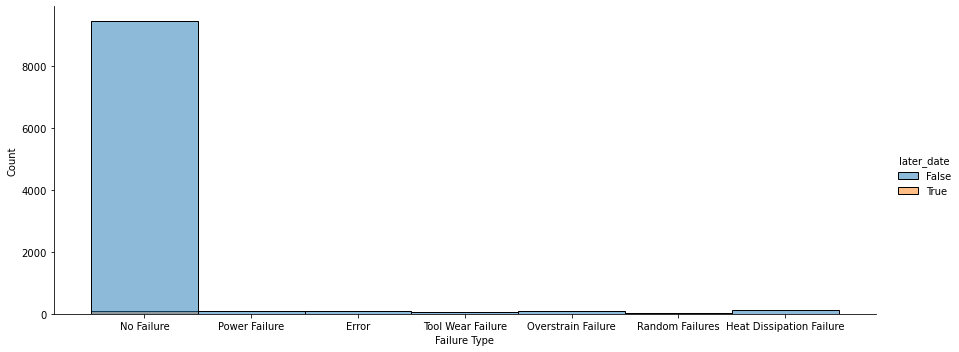

In [13]:
for col in feature_cols.tolist():
    sns.displot(x=col, aspect=2.5, data=df, hue='later_date')

In [14]:
df = df.drop(columns=['Machine Type'])
feature_cols = feature_cols.drop('Machine Type')

In [15]:
failure_dummies = pd.get_dummies(df['Failure Type'])
print(failure_dummies.columns)
df = pd.concat([df, failure_dummies], axis=1)

Index(['Error', 'Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype='object')


<AxesSubplot:>

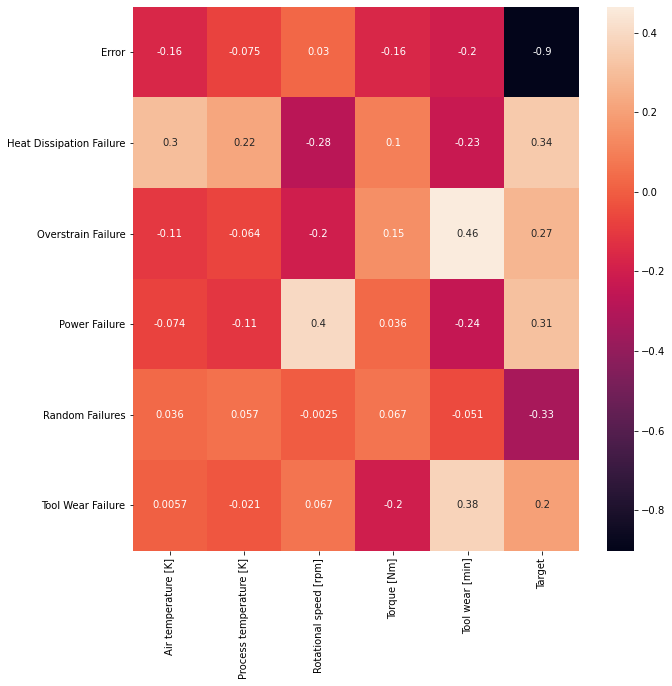

In [16]:
plot_df = df.loc[df['No Failure'] == 0]
plot_df = plot_df.drop(columns=['No Failure'])
sns.heatmap(plot_df.corr().iloc[-6:, :-7], annot=True)

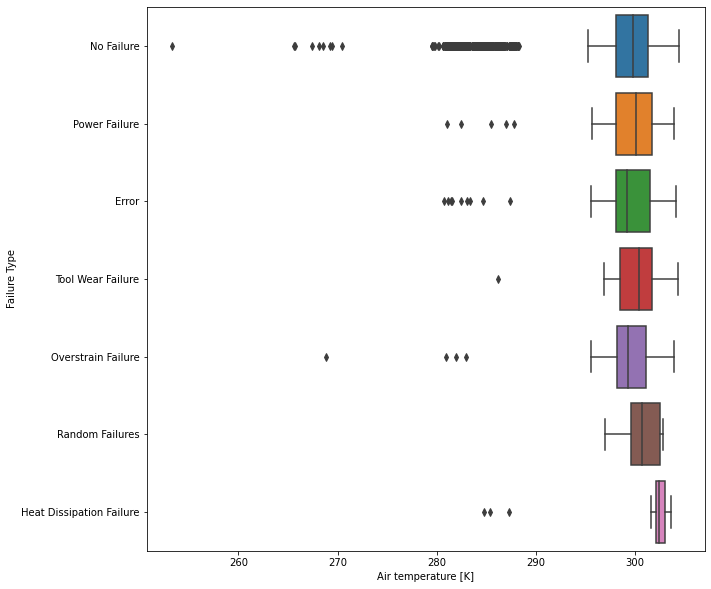

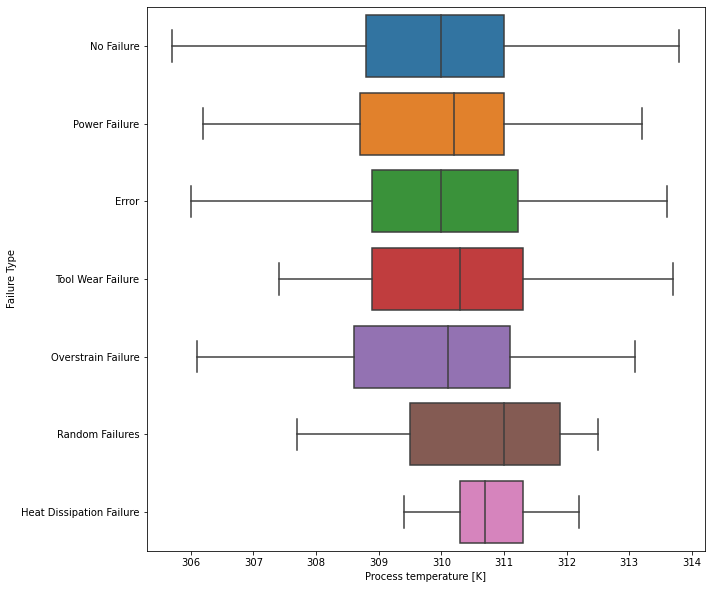

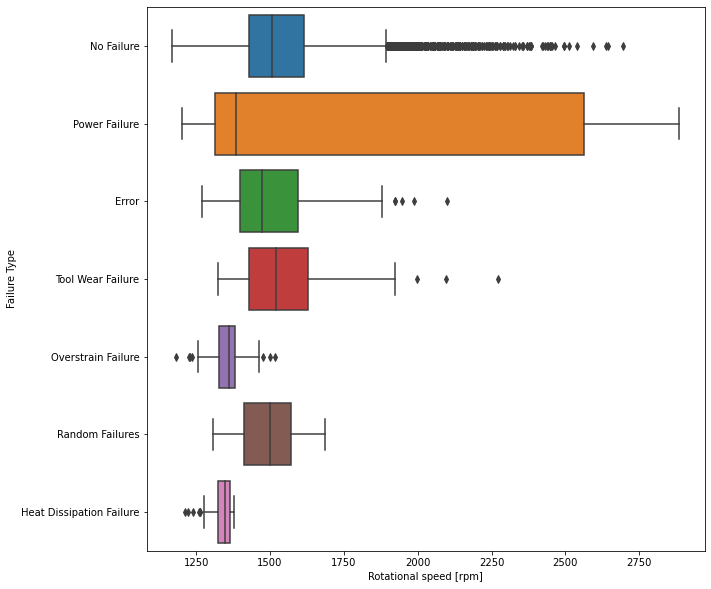

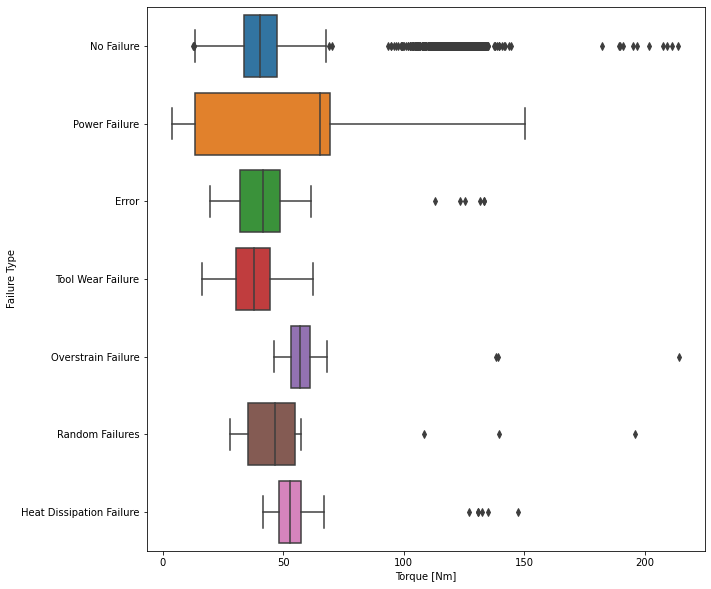

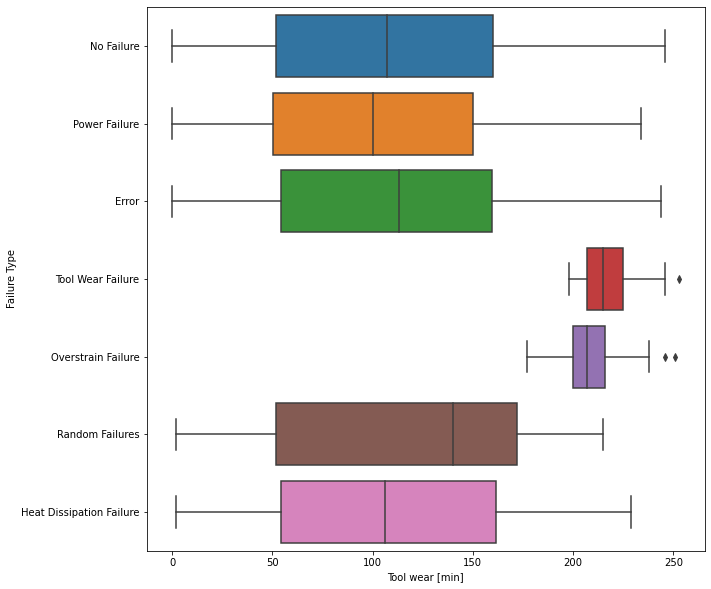

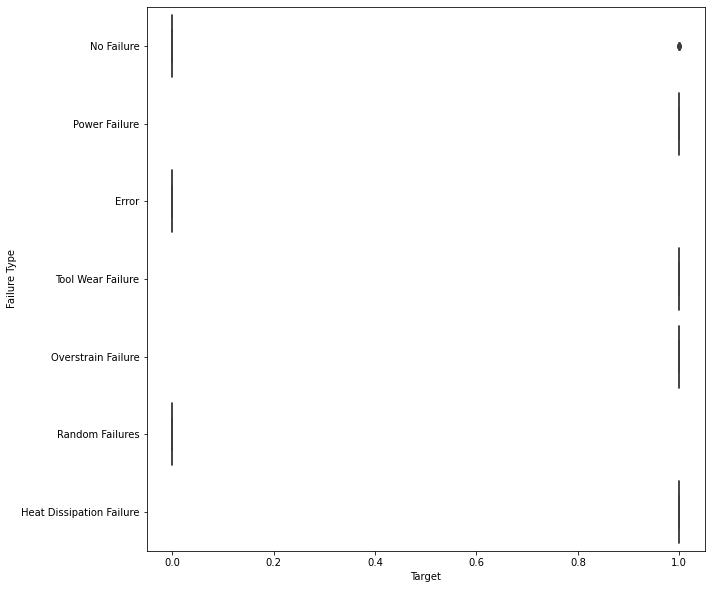

In [17]:
for col in feature_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.show()
        sns.boxplot(x=col, y='Failure Type', data=df)

In [18]:
nulls = df.isnull().sum()

df['rpm_null'] = df['Rotational speed [rpm]'].isnull()
display(nulls/df.count() * 100)
display(nulls)

Air temperature [K]         0.000000
Error                       0.000000
Failure Type                0.000000
Heat Dissipation Failure    0.000000
No Failure                  0.000000
Overstrain Failure          0.000000
Power Failure               0.000000
Process temperature [K]     0.000000
Random Failures             0.000000
Rotational speed [rpm]      1.010101
Target                      0.000000
Timestamp                   0.000000
Tool Wear Failure           0.000000
Tool wear [min]             0.000000
Torque [Nm]                 0.000000
UID                         0.000000
later_date                  0.000000
rpm_null                         NaN
dtype: float64

UID                           0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]      100
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
Timestamp                     0
later_date                    0
Error                         0
Heat Dissipation Failure      0
No Failure                    0
Overstrain Failure            0
Power Failure                 0
Random Failures               0
Tool Wear Failure             0
dtype: int64

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


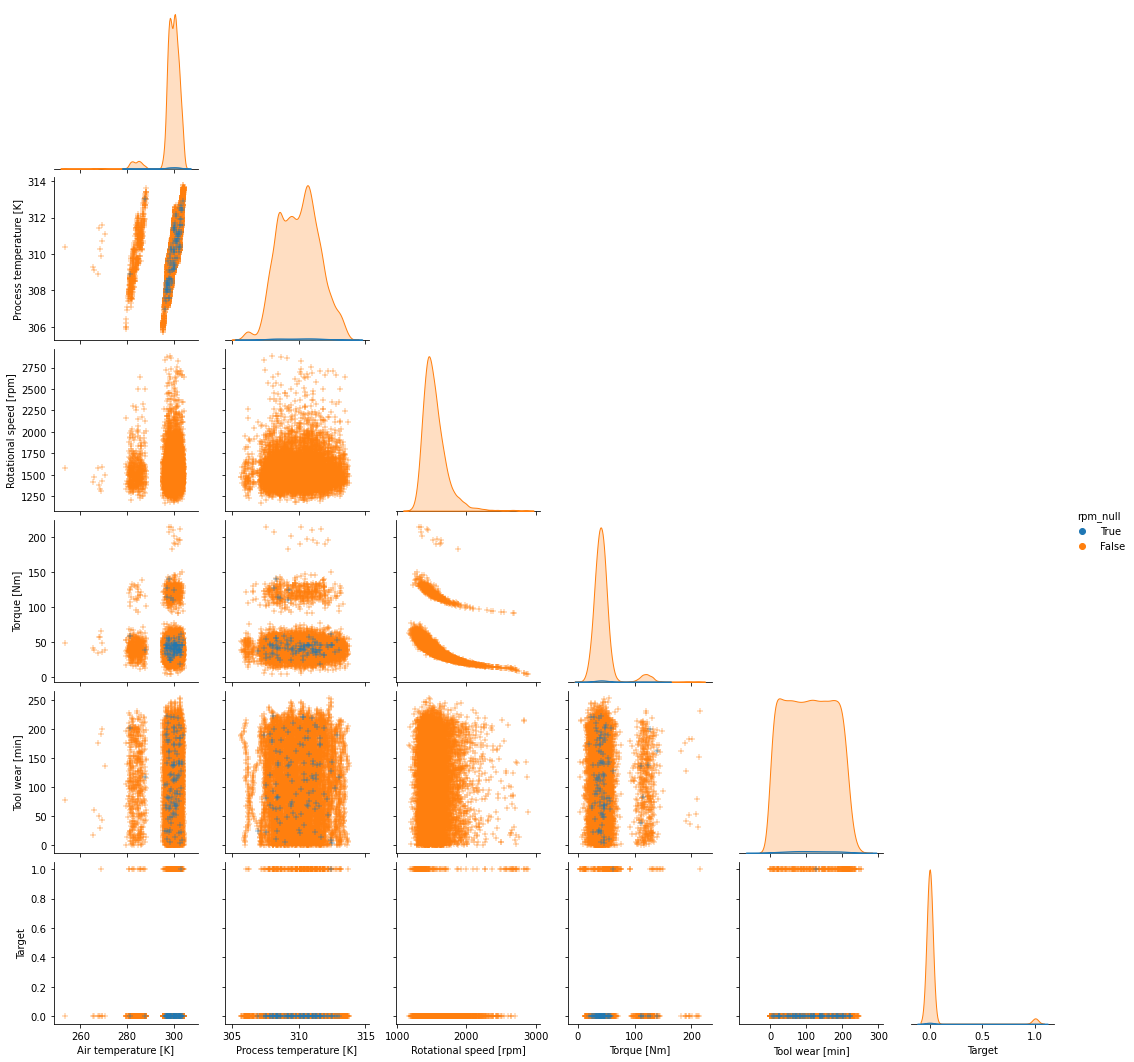

In [19]:
plot_df = df[feature_cols.tolist() + ['rpm_null']]
plot_df = plot_df.sort_values(by='rpm_null')
sns.pairplot(plot_df, hue='rpm_null', hue_order=[True, False], corner=True, markers='+')

In [20]:
# sklearn, rf imterative imputer
# outliers
# feature engineering / feature selection
# modelling

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


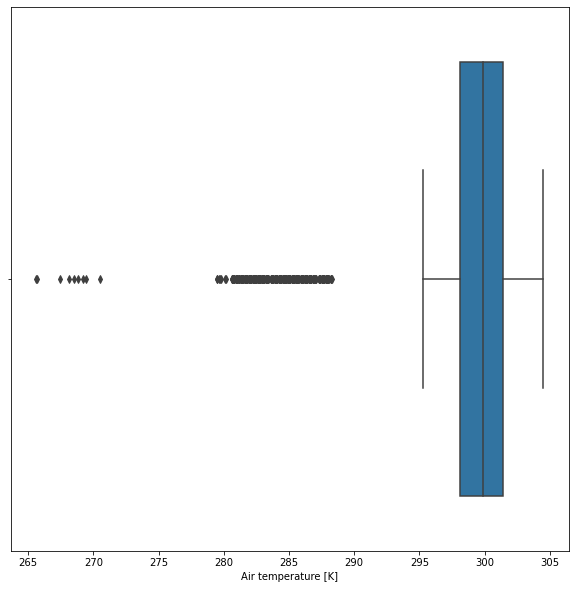

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


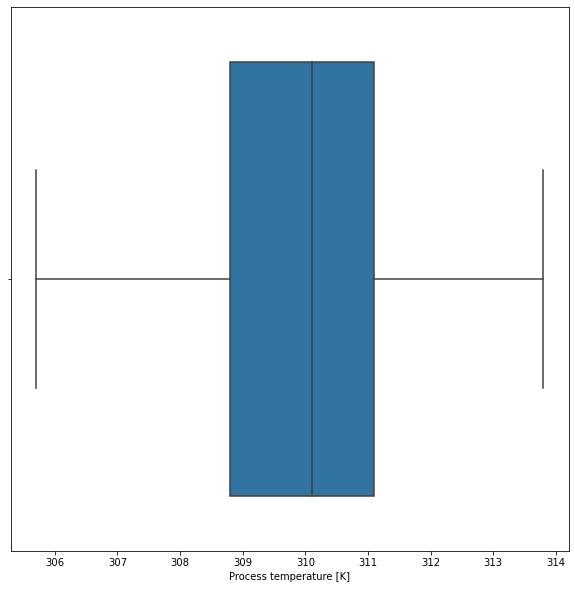

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


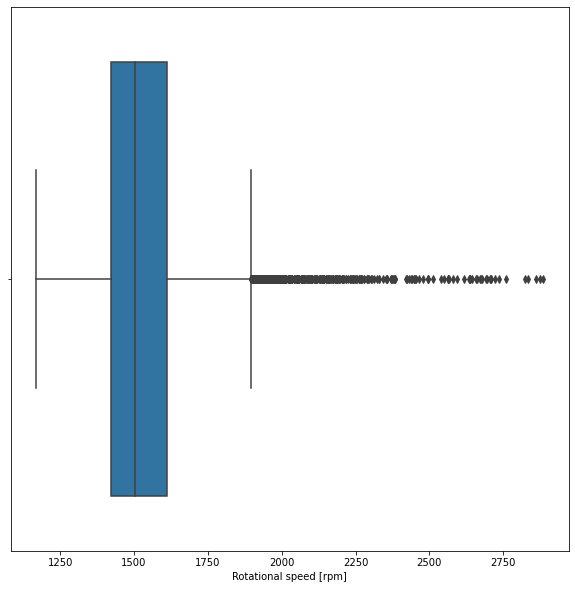

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


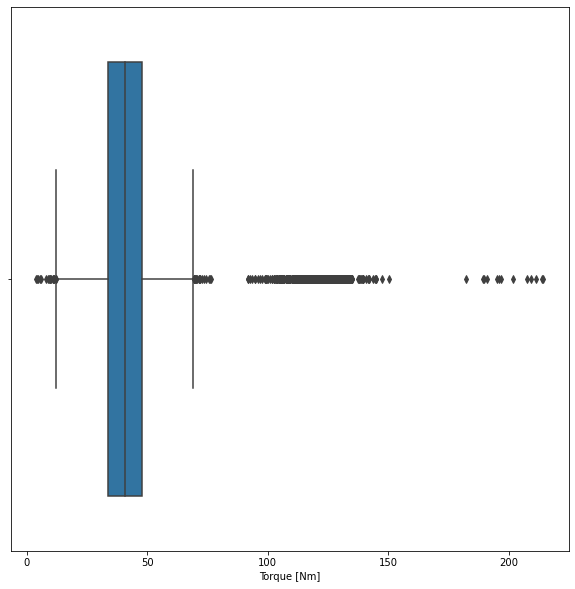

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


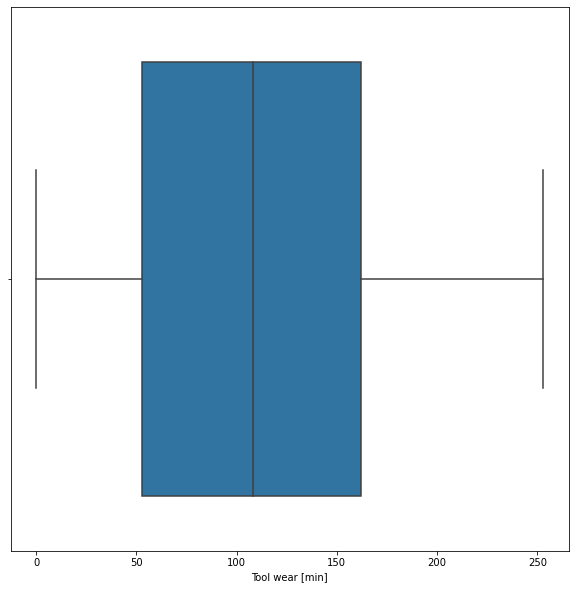

/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


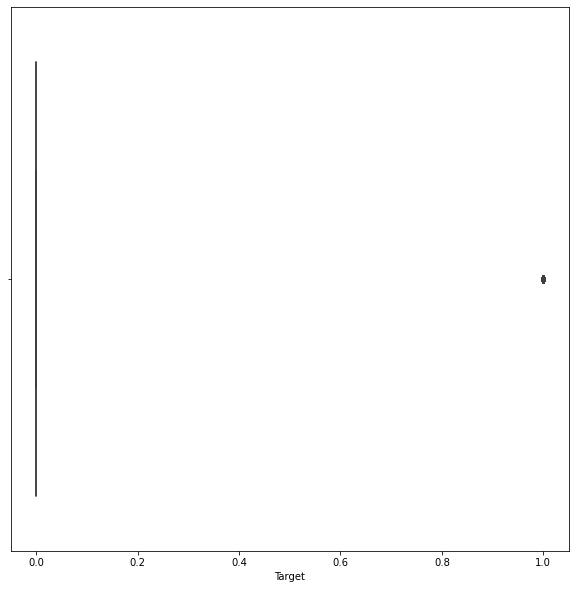

In [29]:
for col in feature_cols:
    if col == 'Failure Type':
        continue
    plt.show()
    sns.boxplot(df[col])

In [21]:
#df.sort_values(by='Air temperature [K]')
from sklearn.preprocessing import StandardScaler

air_temp_scaler = StandardScaler()
scaled = air_temp_scaler.fit_transform(df['Air temperature [K]'].to_numpy().reshape(-1, 1))
scaled = scaled.reshape(-1)
sorted_scaled = sorted(scaled)
print('Low range of the distribution')
print(sorted_scaled[:15])
print('High range of the distribution')
print(sorted_scaled[-15:])
df = df.loc[scaled != sorted_scaled[0]]

Low range of the distribution
[-11.237646505266282, -8.226574447977981, -8.20209418734963, -7.785929756667509, -7.614567932268978, -7.516646889755542, -7.443206107870459, -7.345285065357024, -7.296324544100306, -7.027041677188339, -4.823818220635926, -4.823818220635926, -4.79933796000756, -4.774857699379208, -4.750377438750842]
High range of the distribution
[1.2472864151973948, 1.2472864151973948, 1.2472864151973948, 1.2472864151973948, 1.2472864151973948, 1.2472864151973948, 1.2472864151973948, 1.2717666758257464, 1.2717666758257464, 1.2717666758257464, 1.2717666758257464, 1.2717666758257464, 1.2717666758257464, 1.2717666758257464, 1.2962469364541123]


In [22]:
df.to_csv('modelling_dataset.csv', index=False)